In [1]:
import numpy as np
import threading
import os
import time
import multiprocessing
import cv2
import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('/content/bg.jpg')
img = cv2.resize(img, (512, 512))

In [5]:
data = (np.random.randint(-1, 1, (3,3,3)))

In [6]:
def convolvee(image):
    (iH, iW) = image.shape[:2]
    (kH, kW) = data.shape[:2]

    pad = 0
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad,
        cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):

            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            k = (roi * data).sum()

            output[y - pad, x - pad] = k


    output = (output * 255).astype("uint8")
    return output

Time: 1.9566409587860107


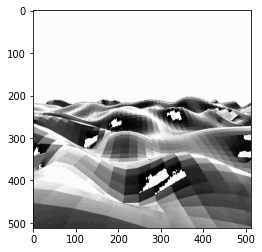

In [7]:
start = time.time()

new_img = convolvee(img)

end = time.time()

print("Time:",end-start)

plt.imshow(new_img, cmap='gray')